# <center><h1 style = "color:navy;">Titanic Survival Logistic Regression</h1></center>

In [1]:
#import all necessary modules
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler     #for scaling the features before modelling

## <h1 style="color:indigo">1.  Exploratory Data Analysis(EDA)</h1>

### <h2 style="color:purple">a. Load and explore the data</h2>

In [2]:
X_train = pd.read_csv("Titanic_train.csv")
X_test = pd.read_csv("Titanic_test.csv")

In [3]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1]:
X_test.head()

NameError: name 'X_test' is not defined

In [5]:
X_train.shape

(891, 12)

In [6]:
X_test.shape

(418, 11)

After comparing both the dataframes, test dataset doesn't have the "Survived" column, that means it is our target column. As we don't have target column in our "Titanic_test" data <b>we cannot use testing data in our modelling process to evaluate how the model works on testing data</b>. Testing data will be used to only predict our y values.

### <h2 style="color:purple">b. Clean the data</h2>

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Let's check if PassengerId have all unique values, if yes, we will set that column as indexfor both the dataset

In [9]:
X_train['PassengerId'].nunique()

891

In [10]:
X_test['PassengerId'].nunique()

418

In [11]:
X_train.set_index("PassengerId", inplace=True)
X_test.set_index("PassengerId", inplace=True)

In [12]:
#Checking for duplicate values in the dataset

X_train[X_train.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [13]:
X_train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [14]:
#For now we will remove the"Name" column as it is all unique
X_train.pop('Name')
X_test.pop('Name')

PassengerId
892                                 Kelly, Mr. James
893                 Wilkes, Mrs. James (Ellen Needs)
894                        Myles, Mr. Thomas Francis
895                                 Wirz, Mr. Albert
896     Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                            ...                     
1305                              Spector, Mr. Woolf
1306                    Oliva y Ocana, Dona. Fermina
1307                    Saether, Mr. Simon Sivertsen
1308                             Ware, Mr. Frederick
1309                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

Changing the following columns into category type:

1. Pclass
2. Sex
3.Cabin
4.Embarked

We will leave ticket as String Object itself.

In [15]:
X_train['Pclass'] = X_train['Pclass'].astype("category")
X_train['Sex'] = X_train['Sex'].astype("category")
X_train['Cabin'] = X_train['Cabin'].astype("category")
X_train['Embarked'] = X_train['Embarked'].astype("category")
X_train['Survived'] = X_train['Survived'].astype("category")
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Ticket    891 non-null    object  
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    category
 9   Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 52.7+ KB


In [16]:
X_train.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [17]:
titanic = X_train.copy()

### <h2 style="color:purple">c. Feature Analysis</h2>

### <h3 style="color:midnightblue">Numerical columns</h3>

#### 1. Age

In [18]:
titanic["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [19]:
titanic["Age"].isna().sum()

177

In our dataset, most number of passengers are 24 year olds.
There are 177 passengers in the dataset whose age we do not know

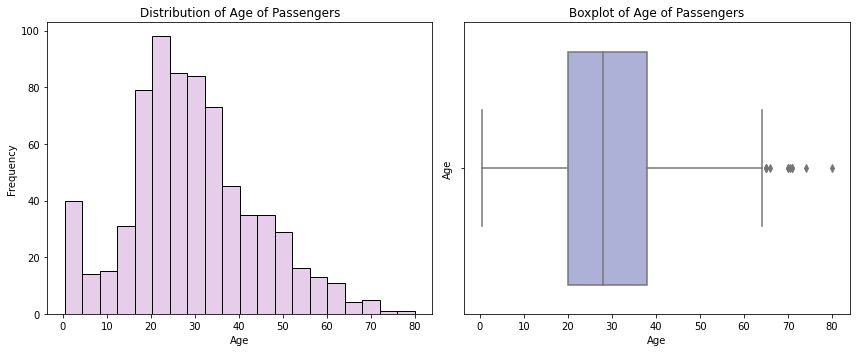

In [20]:
# Set up the subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
sns.histplot(data=titanic['Age'], color='#DEBEE5', ax=axes[0])
axes[0].set_title('Distribution of Age of Passengers')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Age')

# Plot the boxplot
sns.boxplot(data=titanic, x="Age", color='#A7ABDE', ax=axes[1])
axes[1].set_title('Boxplot of Age of Passengers')
axes[1].set_ylabel('Age')

# Adjust layout
plt.tight_layout()
plt.show()

In [21]:
titanic[titanic['Age']== 24]['Age'].count()

30

Mode is 24 but only 30 people in our dataset have that age. If we replace the null values(total 177) with only mode, the bar in the histogram will become taller. Hence we will deal with null values later after finding patterns in the data visualization step

Creating "Age Group" columns to create a interval based column based of "Age" column to catch any pattern in later analysis

In [2]:
bins = [0,12,18,25,40,60, float('inf')]
labels=[0,1,2,3,4,5]

titanic['Age Group'] = pd.cut(titanic['Age'], bins= bins,labels= labels,right = False)
titanic

NameError: name 'pd' is not defined

#### 2. Fare

In [23]:
titanic["Fare"].isna().sum()

0

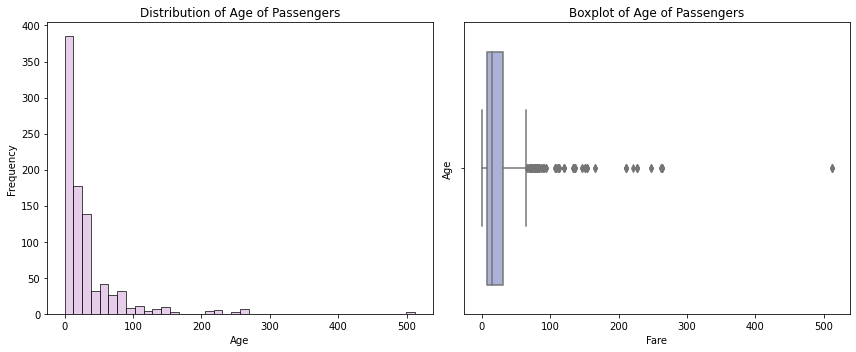

In [24]:
# Set up the subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
sns.histplot(data=titanic['Fare'], color='#DEBEE5', ax=axes[0], bins = 40)
axes[0].set_title('Distribution of Age of Passengers')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Age')

# Plot the boxplot
sns.boxplot(data=titanic, x = 'Fare', color='#A7ABDE', ax=axes[1])
axes[1].set_title('Boxplot of Age of Passengers')
axes[1].set_ylabel('Age')

# Adjust layout
plt.tight_layout()
plt.show()

Creating "Fare Group" columns to create a interval based column based of "Fare" column to catch any pattern in later analysis

In [25]:
bins = [0,25,50,100,200, float('inf')]
labels=[0,1,2,3,4]

titanic['Fare Group'] = pd.cut(titanic['Fare'], bins= bins,labels= labels,right = False)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Fare Group
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3,2
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3,0
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,2,1
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0


<Axes: >

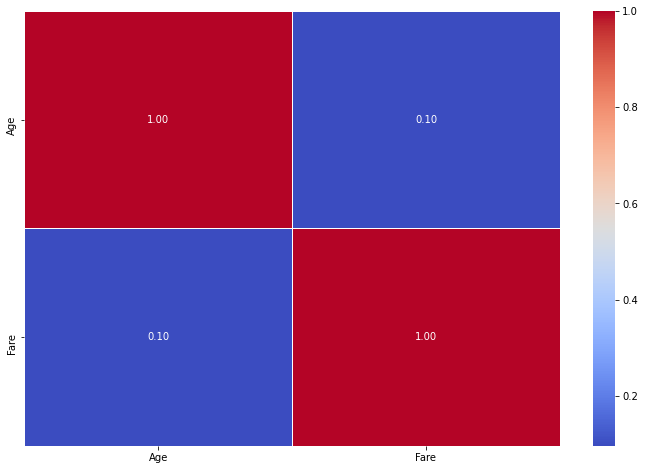

In [26]:
plt.figure(figsize=(12, 8))  # Set the figure size
correlation_matrix = titanic[['Age','Fare']].corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)


### <h3 style="color:midnightblue">Categorical columns</h3>

#### 3.Pclass

#### For the remaining cateogorical columns,we will create a bar graph and box plot for each column to check for any patterns.

Note: Instead of using the same plotting code again and again, a function for visualization have been created below

In [27]:
def plot_grouped_bargraph_ratio(feature, target, feature_name, target_name):
    """
    Function to create a grouped bar chart with ratios.
    
    Parameters:
        feature (pd.Series): The feature column (series).
        target (pd.Series): The target column (series).
        feature_name (str): Name of the feature column (for labeling).
        target_name (str): Name of the target column (for labeling).
    """
    # Combine feature and target into a single DataFrame
    data = pd.DataFrame({feature_name: feature, target_name: target})
    
    # Calculate counts for each feature-target combination
    count_data = data.groupby([feature_name, target_name]).size().reset_index(name='Count')
    
    # Calculate total counts per feature to compute the ratio
    total_counts = count_data.groupby(feature_name)['Count'].transform('sum')
    count_data['Ratio'] = count_data['Count'] / total_counts
    
    # Plot the grouped bar chart
    plt.figure(figsize=(12, 7))
    sns.barplot(
        x=feature_name, 
        y='Ratio', 
        hue=target_name, 
        data=count_data, 
        palette="mako"
    )
    plt.title(f'Grouped Bar Chart of {target_name} by {feature_name} (as Ratios)', fontsize=14)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Ratio', fontsize=12)
    plt.legend(title=target_name)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Ratios are between 0 and 1
    plt.show()

# Example usage:
# plot_grouped_bargraph_ratio(feature_series, target_series, "Feature Name", "Target Name")


In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_heatmap_counts(feature, target, feature_name, target_name):
    """
    Function to create a heatmap of counts for two categorical variables.
    
    Parameters:
        feature (pd.Series): The feature column (series).
        target (pd.Series): The target column (series).
        feature_name (str): Name of the feature column (for labeling).
        target_name (str): Name of the target column (for labeling).
    """
    # Combine feature and target into a single DataFrame
    data = pd.DataFrame({feature_name: feature, target_name: target})
    
    # Create a pivot table for the counts
    count_matrix = data.pivot_table(
        index=target_name, 
        columns=feature_name, 
        aggfunc='size', 
        fill_value=0
    )
    
    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(count_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title(f'Heatmap of Counts: {target_name} by {feature_name}', fontsize=14)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel(target_name, fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Example usage:
# Assuming `feature_series` and `target_series` are Pandas Series
# plot_heatmap_counts(feature_series, target_series, "Feature Name", "Target Name")


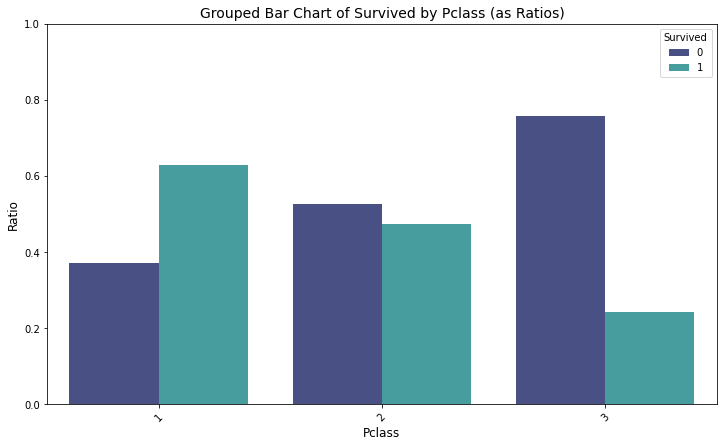

In [29]:
plot_grouped_bargraph_ratio(titanic['Pclass'],titanic['Survived'], "Pclass","Survived")

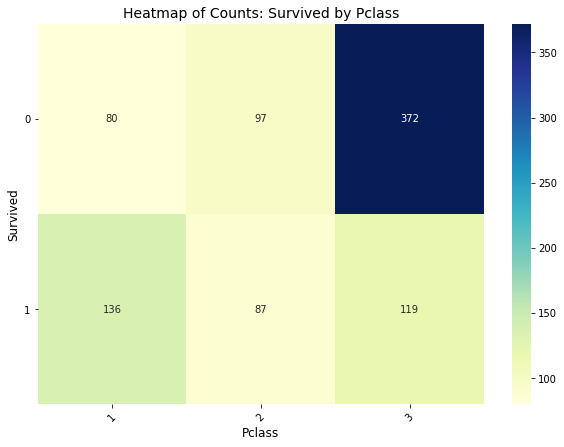

In [30]:
plot_heatmap_counts(titanic['Pclass'],titanic['Survived'], "Pclass","Survived")

#### 4. Sex

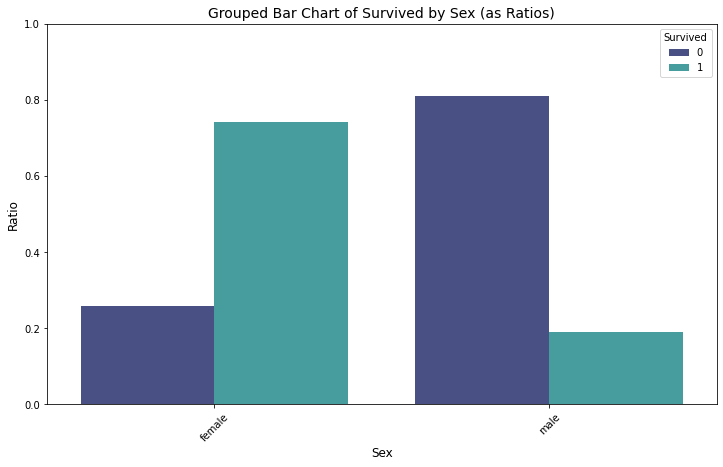

In [31]:
plot_grouped_bargraph_ratio(titanic['Sex'],titanic['Survived'], "Sex","Survived")

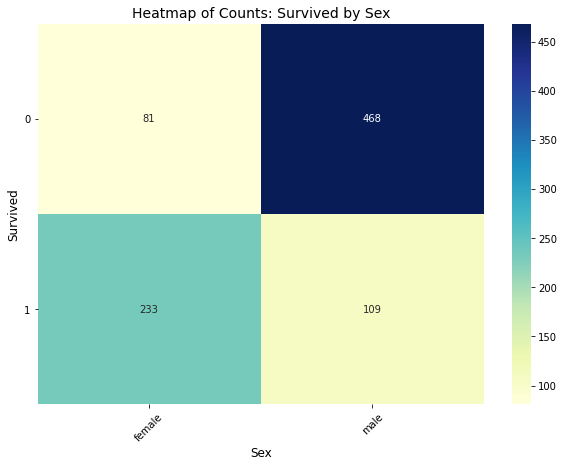

In [32]:
plot_heatmap_counts(titanic['Sex'],titanic['Survived'], "Sex","Survived")

#### 5. SibSp

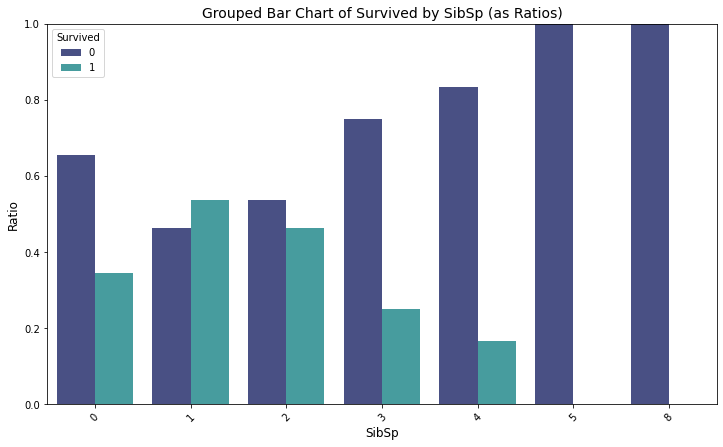

In [33]:
plot_grouped_bargraph_ratio(titanic['SibSp'],titanic['Survived'], "SibSp","Survived")

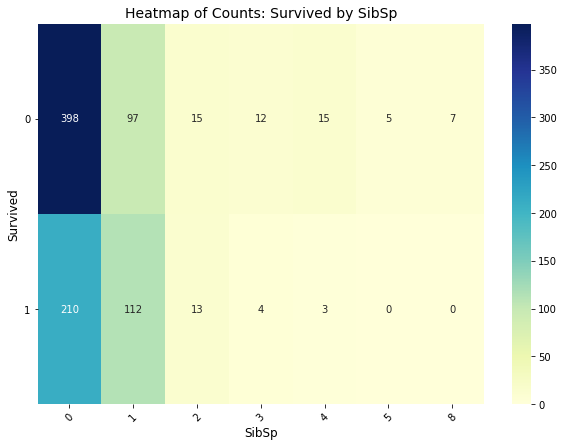

In [34]:
plot_heatmap_counts(titanic['SibSp'],titanic['Survived'], "SibSp","Survived")

#### 6. Parch

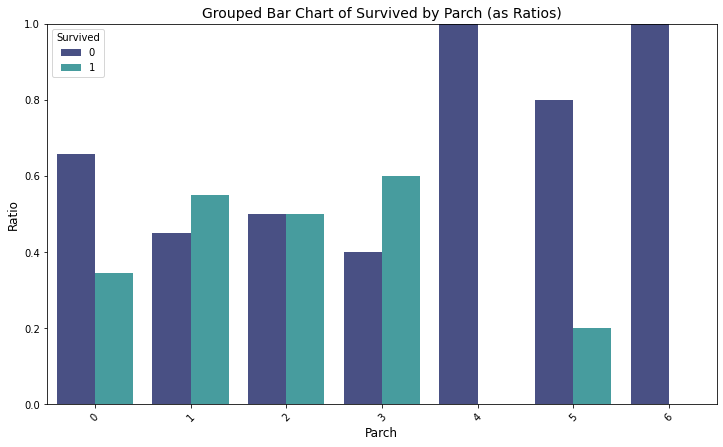

In [35]:
plot_grouped_bargraph_ratio(titanic['Parch'],titanic['Survived'], "Parch","Survived")

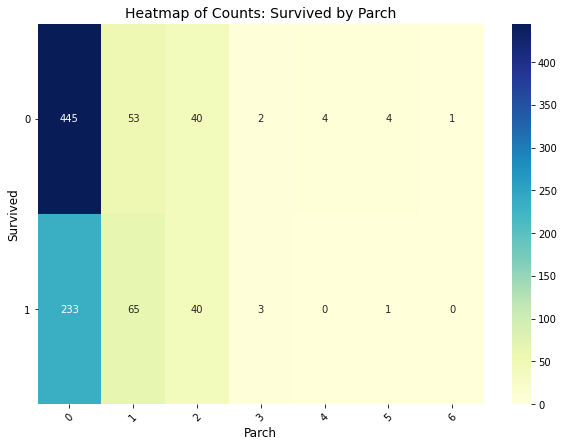

In [36]:
plot_heatmap_counts(titanic['Parch'],titanic['Survived'], "Parch","Survived")

#### 7. Cabin

In [37]:
titanic['Cabin'].nunique()

147

In [38]:
titanic[titanic["Cabin"].str.startswith("T", na=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Fare Group
PassengerId,,,,,,,,,,,,
340,0,1,male,45.0,0,0,113784,35.5,T,S,4,1


In [39]:
titanic["Cabin_class"] = titanic["Cabin"].str[0]
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Fare Group,Cabin_class
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,NaN
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,NaN
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3,2,C
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3,0,NaN
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,2,1,B
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,NaN


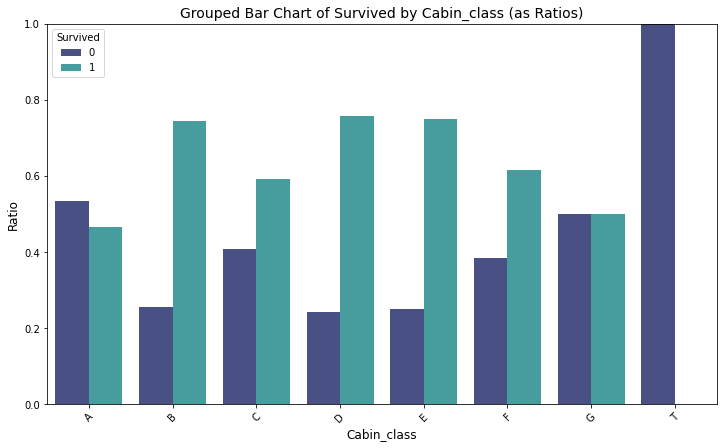

In [40]:
plot_grouped_bargraph_ratio(titanic['Cabin_class'],titanic['Survived'], "Cabin_class","Survived")

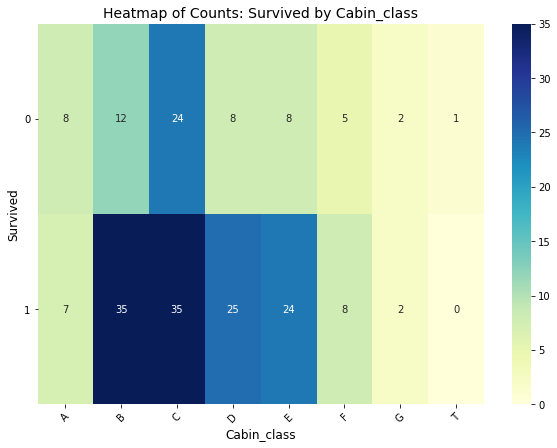

In [41]:
plot_heatmap_counts(titanic['Cabin_class'],titanic['Survived'], "Cabin_class","Survived")

#### 8. Embarked

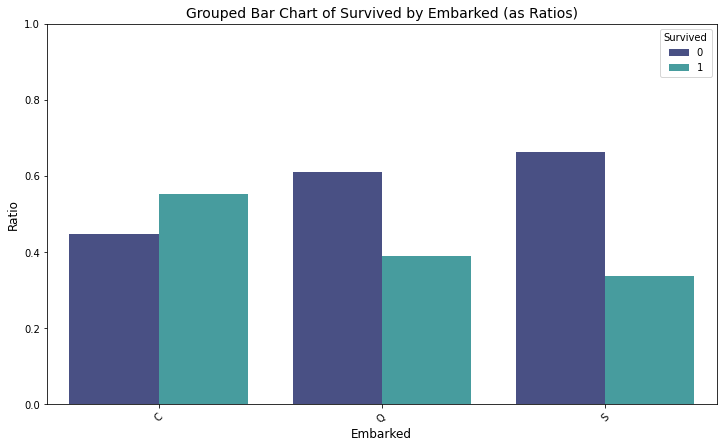

In [42]:
plot_grouped_bargraph_ratio(titanic['Embarked'],titanic['Survived'], "Embarked","Survived")

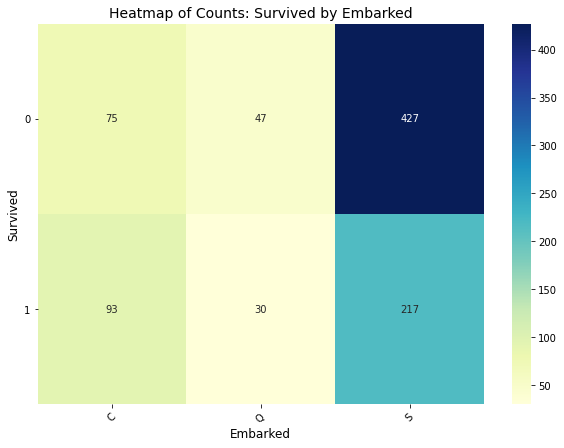

In [43]:
plot_heatmap_counts(titanic['Embarked'],titanic['Survived'], "Embarked","Survived")

In [44]:
titanic["Alone"]=1
titanic.loc[(titanic['SibSp'].astype(int)== 0) & (titanic['Parch'].astype(int) == 0),"Alone"]= 0

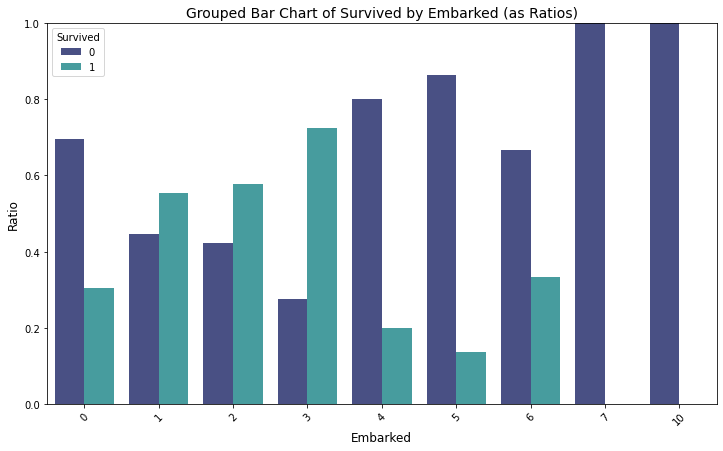

In [45]:
titanic["Dependants"]=titanic['SibSp'] + titanic['Parch']
plot_grouped_bargraph_ratio(titanic['Dependants'],titanic['Survived'], "Embarked","Survived")

### <h2 style="color:purple">d. Cramer's V</h2>

In [46]:

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramér's V for two categorical variables.
    
    Args:
        x (pd.Series): Categorical predictor variable.
        y (pd.Series): Categorical target variable.
    
    Returns:
        float: Cramér's V value.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform the Chi-Square test
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    # Get the total number of observations
    n = contingency_table.sum().sum()
    
    # Calculate the number of categories for each variable
    k = contingency_table.shape[0]  # Rows
    r = contingency_table.shape[1]  # Columns
    
    # Compute Cramér's V
    v = np.sqrt(chi2 / (n * min(k - 1, r - 1)))
    return v


In [47]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Pclass'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.33981738800531175


In [48]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Sex'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.5409359434469282


In [49]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['SibSp'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.2045273023663305


In [50]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Parch'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.177036916072161


In [51]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Cabin_class'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.2247063041069494


In [52]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Embarked'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.17261682709984438


In [53]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Age Group'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.13901726788770685


In [54]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Fare Group'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.3049852450634079


In [55]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Alone'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.20100899932318902


In [56]:
# Calculate Cramér's V
cramers_v_value = cramers_v(titanic['Dependants'], titanic['Survived'])
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: 0.30090084245430265


According to Cramer's V:
1. Pclass
2.Sex
3. Fare Group
4. Dependants

looks like have a good association with out target variable

Followed by

4. SibSp
5. Parch
6. Embarked

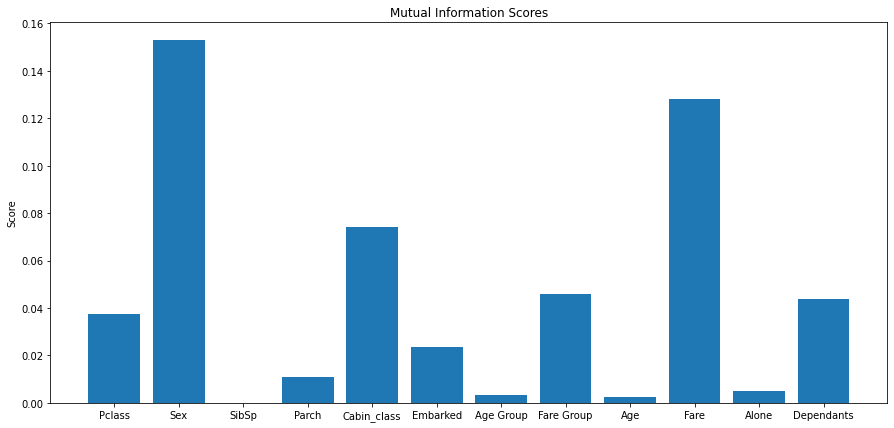

array([0.03738681, 0.15279002, 0.00015588, 0.01099379, 0.07404745,
       0.02371611, 0.00348687, 0.04608422, 0.00247938, 0.12825871,
       0.00487386, 0.04390987])

In [57]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data_encoded = titanic.apply(LabelEncoder().fit_transform)

# Calculate MI for all predictors
mi_scores = mutual_info_classif(data_encoded[['Pclass', 'Sex','SibSp','Parch','Cabin_class','Embarked','Age Group','Fare Group','Age','Fare',"Alone","Dependants"]], titanic['Survived'])

# Plot MI Scores
plt.figure(figsize=(15, 7))
plt.bar(['Pclass', 'Sex','SibSp','Parch','Cabin_class','Embarked','Age Group','Fare Group','Age','Fare','Alone','Dependants'], mi_scores)
plt.title('Mutual Information Scores')
plt.ylabel('Score')
plt.show()
mi_scores

According to Mutual Information Score, the following  features have high score

1. Pclass
2. Sex
3. Cabin_class
4.Fare
5.Fare Group

If you run the above code multiple times, only these features have high bars.

1. Pclass
2. Sex
3. Fare

Followed by some average scores for the following:

1. Cabin_class
2. Fare Group
3. Dependants

### <h2 style="color:purple">d. Handling Null Values</h2>

We will check how the Age column is changing with other columns like SibSp, Parch and Pclass

<Axes: xlabel='SibSp', ylabel='Age'>

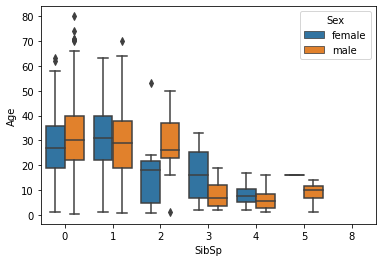

In [58]:
sns.boxplot(x='SibSp',y='Age',hue='Sex',data=titanic)

<Axes: xlabel='Parch', ylabel='Age'>

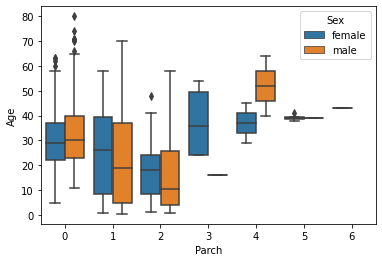

In [59]:
sns.boxplot(x='Parch',y='Age',hue='Sex',data=titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

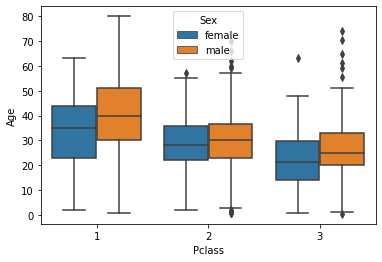

In [60]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=titanic)

<Axes: xlabel='Cabin_class', ylabel='Age'>

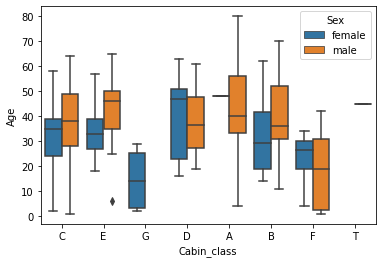

In [61]:
sns.boxplot(x='Cabin_class',y='Age',hue='Sex',data=titanic)

In [62]:
titanic.groupby(['SibSp', 'Parch'])['Age'].median()

SibSp  Parch
0      0        29.5
       1        27.0
       2        20.5
       3        24.0
       4        29.0
       5        40.0
1      0        30.0
       1        30.5
       2        24.0
       3        48.0
       4        45.0
       5        39.0
       6        43.0
2      0        28.0
       1         4.0
       2        19.5
       3        24.0
3      0        31.5
       1         3.0
       2        10.0
4      1         7.0
       2         6.0
5      2        11.0
8      2         NaN
Name: Age, dtype: float64

We will check if these values have made any difference to the distribution

7


Text(0.5, 0, 'Age')

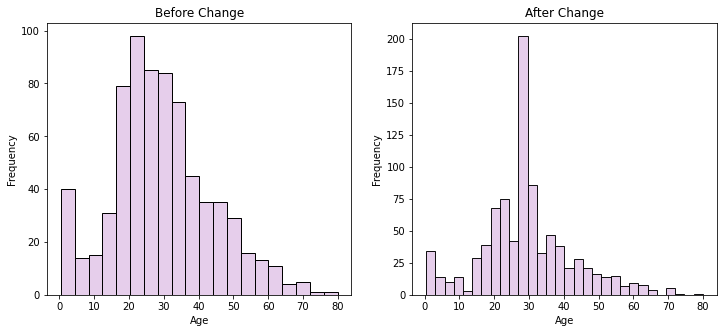

In [63]:
# Set up the subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram
sns.histplot(data=titanic['Age'], color='#DEBEE5', ax=axes[0])
axes[0].set_title('Before Change')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Age')

# Group-based imputation
titanic['Age'] = titanic.groupby(['SibSp', 'Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

# Verify if null values are imputed
print(titanic['Age'].isnull().sum())

# Plot the histogram
sns.histplot(data=titanic['Age'], color='#DEBEE5', ax=axes[1])
axes[1].set_title('After Change')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Age')

Only the mean has increased, rest everything looks almost the same as before

In [64]:
titanic[titanic['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Fare Group,Cabin_class,Alone,Dependants
PassengerId,,,,,,,,,,,,,,,
160,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10
181,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10
202,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10
325,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10
793,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10
847,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10
864,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,2,NaN,1,10


They looks like they belong to the same family and only one of the survived. We will do another group based imputation based "Parch" column only. 

In [65]:
# Group-based imputation
titanic['Age'] = titanic.groupby(['Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

# Verify if null values are imputed
print(titanic['Age'].isnull().sum())

0


## <h1 style="color:indigo">2.  Data Preprocessing</h1>

In [66]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Fare Group,Cabin_class,Alone,Dependants
PassengerId,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,NaN,1,1
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,C,1,1
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,NaN,0,0
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3,2,C,1,1
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,3,0,NaN,0,0


In [67]:
titanic.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age Group      177
Fare Group       0
Cabin_class    687
Alone            0
Dependants       0
dtype: int64

We are going to drop the column Cabin_class because more than 75% percentage of data is null. Cabin_class had good potiential to be good predictor if it had more accurate values

The columns selected for modelling process for Model 1 are:
1.Pclass
2.Sex
3.Fare

In model 2, we will add these additional features and check the scores:

- SibSp
- Parch
- Embarked
- Age

In [68]:
titanic['Pclass'].unique()

[3, 1, 2]
Categories (3, int64): [1, 2, 3]

In [69]:
titanic['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [70]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [71]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [72]:
titanic['Embarked'].unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']

In [73]:
titanic['Embarked'] = titanic['Embarked'].cat.add_categories('Unknown')
titanic['Embarked'].fillna('Unknown')

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: category
Categories (4, object): ['C', 'Q', 'S', 'Unknown']

In [103]:
titanic[["Age","Fare"]].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.414893,32.204208
std,13.177185,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.500000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [74]:
titanic_preprocessed = titanic[["Age","Fare"]]
import pickle
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_preprocessed)
scaled_df = scaler.transform(titanic_preprocessed)
titanic_preprocessed = pd.DataFrame(scaled_df,columns=titanic_preprocessed.columns, index =titanic_preprocessed.index)



In [75]:
titanic_preprocessed["Pclass"] = titanic["Pclass"].copy()
titanic_preprocessed["SibSp"] = titanic["SibSp"].copy()
titanic_preprocessed["Parch"]= titanic["Parch"].copy() 
titanic_preprocessed["Dependants"] = titanic["Dependants"].copy()
titanic_preprocessed.head()

,Age,Fare,Pclass,SibSp,Parch,Dependants
PassengerId,,,,,,
1,0.271174,0.014151,3,1,0,1
2,0.472229,0.139136,1,1,0,1
3,0.321438,0.015469,3,0,0,0
4,0.434531,0.103644,1,1,0,1
5,0.434531,0.015713,3,0,0,0


We are not going to use one hot encoding in Pclass, because it is Ordinal.

In [76]:
temp = pd.get_dummies(titanic[["Sex","Embarked"]])
encoded = pd.DataFrame(temp[["Sex_male","Embarked_C","Embarked_Q","Embarked_S"]], index = titanic_preprocessed.index)
titanic_preprocessed = pd.concat([titanic_preprocessed, encoded], axis = 1)
titanic_preprocessed.head()

,Age,Fare,Pclass,SibSp,Parch,Dependants,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0.271174,0.014151,3,1,0,1,True,False,False,True
2,0.472229,0.139136,1,1,0,1,False,True,False,False
3,0.321438,0.015469,3,0,0,0,False,False,False,True
4,0.434531,0.103644,1,1,0,1,False,False,False,True
5,0.434531,0.015713,3,0,0,0,True,False,False,True


In [77]:
titanic_preprocessed.shape

(891, 10)

In [78]:
y =titanic['Survived']
y.shape

(891,)

## <h1 style="color:indigo">3. Model Building</h1>

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

#X_train, X_test, y_train, y_test = train_test_split(titanic_preprocessed, y, test_size=0.2, random_state=42)

# Define the KFold cross-validation strategy (e.g., 5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

We won't be spliting the dataset into training and testing dataset,instead we will use kfold validation. Reasons being:
- In our test data, we don't have the target values to check the evaluation metrics
- Cross validation help us better evaluate our model for binary classification

In [80]:
# Model
model = LogisticRegression(random_state=42)

We will be using the same model, but training on different combination of X's and based on the evaluation metrics we will use the optimal set of features for prediction. This is just for comparison purposes.

One  set of combination will contain all the features in the titanic_processed dataframe

And another set will contain the selected features from our EDA analysis


In [81]:
# Step 2: Train and Predict using K-Fold
# cross_val_predict generates predictions for each fold
y_pred_all = cross_val_predict(model, titanic_preprocessed, y, cv=kf, method="predict")
y_prob_all = cross_val_predict(model, titanic_preprocessed, y, cv=kf, method="predict_proba")[:, 1]

In [82]:
X = titanic_preprocessed[['Pclass','Sex_male','Fare']]
y_pred_selected= cross_val_predict(model, X, y, cv=kf, method="predict")
y_prob_selected = cross_val_predict(model, X, y, cv=kf, method="predict_proba")[:, 1]

## <h1 style="color:indigo">4. Model Evaluation</h1>

In [83]:

print("For the model trained by using all the features in titanic_processed dataframe, these are the scores:")
#  Evaluate the Model
accuracy = accuracy_score(y, y_pred_all)
precision = precision_score(y, y_pred_all)
recall = recall_score(y, y_pred_all)
f1 = f1_score(y, y_pred_all)
roc_auc = roc_auc_score(y, y_pred_all)
cfm =confusion_matrix(y,y_pred_all)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")
print(f"Confusion Matrix: {cfm}")

For the model trained by using all the features in titanic_processed dataframe, these are the scores:
Accuracy: 0.796
Precision: 0.755
Recall: 0.693
F1-Score: 0.723
ROC-AUC Score: 0.776
Confusion Matrix: [[472  77]
 [105 237]]


In [84]:
print("For the model trained by using all the features in titanic_processed dataframe, these are the scores:")
#  Evaluate the Model
accuracy = accuracy_score(y, y_pred_selected)
precision = precision_score(y, y_pred_selected)
recall = recall_score(y, y_pred_selected)
f1 = f1_score(y, y_pred_selected)
roc_auc = roc_auc_score(y, y_pred_selected)
cfm =confusion_matrix(y,y_pred_selected)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")
print(f"Confusion Matrix: {cfm}")

For the model trained by using all the features in titanic_processed dataframe, these are the scores:
Accuracy: 0.787
Precision: 0.742
Recall: 0.681
F1-Score: 0.710
ROC-AUC Score: 0.767
Confusion Matrix: [[468  81]
 [109 233]]


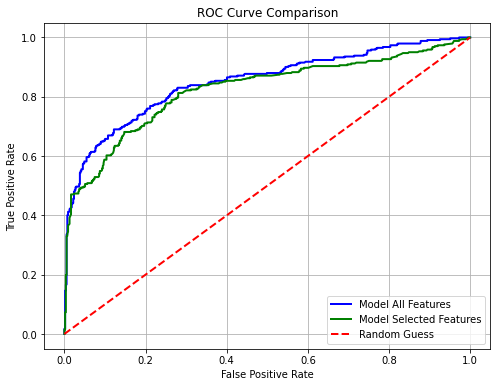

In [85]:

# Compute ROC curve and AUC for model 1
fpr_all, tpr_all, _  = roc_curve(y, y_prob_all)
#roc_auc_all = auc(fpr_all, tpr_all)

# Compute ROC curve and AUC for model 2
fpr_selected, tpr_selected, _ = roc_curve(y, y_prob_selected)
#roc_auc_selected = auc(fpr_selected, tpr_selected)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label=f'Model All Features ')
plt.plot(fpr_selected, tpr_selected, color='green', lw=2, label=f'Model Selected Features')

# Plot diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Even with 3 features,the second model does well in predicting the y values. But we will go ahead with the model that gave the high scores as it is still a simple model and not that computationally heavy.<br>
In our problem,we are gonna assume that we are aiming for high recall  over high precision i.e we don't wanna miss any survivors. Hence,we will lower the threshold.

In [86]:

confusion_matrix(y,y_pred_all)


array([[472,  77],
       [105, 237]], dtype=int64)

In [99]:
# Apply the optimal threshold (e.g., ROC-based)
y_pred_optimal = (y_prob_all >= 0.30).astype(int)

In [100]:
accuracy = accuracy_score(y, y_pred_optimal)
precision = precision_score(y, y_pred_optimal)
recall = recall_score(y, y_pred_optimal)
f1 = f1_score(y, y_pred_optimal)
roc_auc = roc_auc_score(y, y_pred_optimal)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC Score: {roc_auc:.3f}")

Accuracy: 0.765
Precision: 0.656
Recall: 0.819
F1-Score: 0.728
ROC-AUC Score: 0.775


In [101]:
confusion_matrix(y,y_pred_optimal)

array([[402, 147],
       [ 62, 280]], dtype=int64)

In [90]:
final_model =  LogisticRegression()
final_model.fit(titanic_preprocessed, y)

LogisticRegression()

## <h1 style="color:indigo">5.  Interpretation</h1>

Let's explore the coefficients of our final model


In [91]:
final_model.coef_

array([[-2.09095351,  0.49493034, -1.02440906, -0.17548706,  0.05705554,
        -0.11843152, -2.59544456,  0.1108137 ,  0.03306098, -0.33143176]])

In [92]:
titanic_preprocessed.columns

Index(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Dependants', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

- Age: -2.09095351

As age increases, the log-odds of survival decrease significantly. Older passengers are less likely to survive according to this model.
- Fare: 0.49493034

Higher fare values are associated with higher odds of survival. This positive coefficient suggests that passengers who paid more for their tickets were more likely to survive.
- Pclass: -1.02440906

As the passenger class increases (i.e., from 1st class to 3rd class), the odds of survival decrease. Being in a lower class (Pclass 3) decreases the chances of survival.
- SibSp: -0.17548706

The number of siblings or spouses aboard slightly decreases the likelihood of survival. Passengers with more SibSp tend to have lower chances of survival, though the effect is quite small.
- Parch: 0.05705554

The number of parents or children aboard slightly increases the probability of survival. Having more family members aboard seems to have a small positive effect on survival odds.
- Dependants: -0.11843152

The number of dependents (derived feature) slightly decreases the odds of survival. The more dependents, the lower the survival probability.
- Sex_male: -2.59544456

Being male strongly decreases the odds of survival. This large negative coefficient indicates that males had much lower survival rates compared to females on the Titanic.
- Embarked_C: 0.1108137

Passengers who boarded at port 'C' (Cherbourg) had a slight increase in survival odds. This is a small positive effect.
- Embarked_Q: 0.03306098

Passengers who boarded at port 'Q' (Queenstown) have a very small positive effect on survival compared to those who boarded at port 'S' (Southampton).
- Embarked_S: -0.33143176

Passengers who boarded at port 'S' (Southampton) have lower survival odds compared to those who boarded at port 'C'. This is a moderate negative effect, indicating that passengers from Southampton had a lower chance of survival.

<b>We can see that, Age, Pclass and Sex have significant effect on the predicting survival probability</b>

<b>Futher improvements:</b>
   1. We can predict Age and Cabin Class using other features to make the imputation much more accurate
   2. Try different classification model like decision tree, randomeforest, etc

## <h1 style="color:indigo">6. Deployment with Streamlit</h1>

In [104]:
titanic_preprocessed.head()

,Age,Fare,Pclass,SibSp,Parch,Dependants,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0.271174,0.014151,3,1,0,1,True,False,False,True
2,0.472229,0.139136,1,1,0,1,False,True,False,False
3,0.321438,0.015469,3,0,0,0,False,False,False,True
4,0.434531,0.103644,1,1,0,1,False,False,False,True
5,0.434531,0.015713,3,0,0,0,True,False,False,True


We will first train the model in the entire training set,before saving the model

In [93]:
final_model = LogisticRegression(max_iter=400)
final_model.fit(titanic_preprocessed, y)


LogisticRegression(max_iter=400)

In [94]:
#savet the model

with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(final_model, file)


In [95]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file) 
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

- Open Anaconda prompt/ commad prompt(For Windows)
- Go the current directory where this file is saved
- Make sure you have streamlit, check by entering "pip list". 
- Run "streamlit run app.py"

Upload the testing data to get the prediction values

## <center><h1 style="color:indigo">End of Assignment</h1></center>